# 가상환경 torch_cuda_yolo_env

# 추론 객체 감지

In [1]:
import torch
print("torch:", torch.__version__, 
      "cuda:", torch.version.cuda, 
      "is_available:", 
      torch.cuda.is_available())

torch: 2.5.1+cu121 cuda: 12.1 is_available: True


In [2]:
import os
from dotenv import load_dotenv
loaded = load_dotenv()
os.getenv('ROBOFLOW_API_KEY')

'AEShFH33iLAQspAQK5Vx'

In [3]:
from inference_sdk import InferenceHTTPClient
CLIENT = InferenceHTTPClient(
api_url="https://detect.roboflow.com",  
api_key=os.getenv('ROBOFLOW_API_KEY')
)
CLIENT

In [7]:
import os
print(os.path.exists("sample.png"))

True


In [8]:
result = CLIENT.infer('sample.png', model_id="rock-paper-scissors-sxsw/14")
result

{'inference_id': '94e72d48-af8e-4015-a396-07c63a2cd85a',
 'time': 0.05123657200010712,
 'image': {'width': 777, 'height': 593},
 'predictions': [{'x': 535.5,
   'y': 454.0,
   'width': 209.0,
   'height': 202.0,
   'confidence': 0.9349880218505859,
   'class': 'Rock',
   'class_id': 1,
   'detection_id': '2f855b01-457b-444e-9a07-ef4e5fdfca3f'},
  {'x': 581.5,
   'y': 159.5,
   'width': 369.0,
   'height': 257.0,
   'confidence': 0.7297772765159607,
   'class': 'Scissors',
   'class_id': 2,
   'detection_id': '54327758-dd6b-4991-b2ed-4c4b97013f13'},
  {'x': 226.0,
   'y': 436.0,
   'width': 314.0,
   'height': 256.0,
   'confidence': 0.6648696660995483,
   'class': 'Scissors',
   'class_id': 2,
   'detection_id': '0df03d34-9975-4115-ba6f-f2bfe35c873c'},
  {'x': 190.0,
   'y': 161.5,
   'width': 134.0,
   'height': 139.0,
   'confidence': 0.45636704564094543,
   'class': 'Rock',
   'class_id': 1,
   'detection_id': '609118ba-8dec-44e0-a920-d065bc099db3'}]}

In [9]:
import cv2

img = cv2.imread('sample.jpg')
for pred in result['predictions']:
    x = pred['x']
    y = pred['y']
    width = pred['width']
    height = pred['height']
    conf = pred['confidence']
    obj_class = pred['class']
    
    # x1, y1 = int(x-width/2), int(y-height/2)
    # x2, y2 = int(x+width/2), int(y+height/2)
    # cv2.rectangle(img, (x1,y1), (x2, y2), (0,0,255), 2)
    # cv2.putText(img, f'{obj_class} {conf:.4f}', (x1,y1), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255))
    
    print(x,y,width,height,conf,obj_class)

# cv2.imshow('image',img)
# cv2.waitKey()
# cv2.destroyAllWindows()

535.5 454.0 209.0 202.0 0.9349880218505859 Rock
581.5 159.5 369.0 257.0 0.7297772765159607 Scissors
226.0 436.0 314.0 256.0 0.6648696660995483 Scissors
190.0 161.5 134.0 139.0 0.45636704564094543 Rock


[ WARN:0@707.130] global loadsave.cpp:241 findDecoder imread_('sample.jpg'): can't open/read file: check file path/integrity


In [12]:
result = CLIENT.infer('mnist/000001.jpg', model_id='numbers-ldmqq/3')
result

{'inference_id': '02c8d3ad-bf0b-423f-8b56-ed7c5114b3b5',
 'time': 0.042518700000073295,
 'image': {'width': 416, 'height': 416},
 'predictions': []}

# model 가져오기

In [15]:
from roboflow import Roboflow
import cv2
rf = Roboflow(api_key=os.getenv('ROBOFLOW_API_KEY'))
project = rf.workspace().project('numbers-yt0h2')
numbers_model = project.version(2).model
numbers_model

loading Roboflow workspace...
loading Roboflow project...


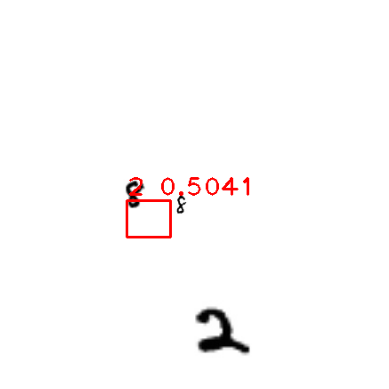

In [19]:
import matplotlib.pyplot as plt
import cv2

filename = 'mnist/000001.jpg'

# 1. 원본 이미지 읽기
img = cv2.imread(filename)

# 2. 모델 예측
result = numbers_model.predict(filename, confidence=40, overlap=30)

# 3. 바운딩박스 그리기
for pred in result:
    x, y = pred['x'], pred['y']
    width, height = pred['width'], pred['height']
    conf = pred['confidence']
    cls = pred['class']
    
    x1, y1 = int(x - width/2), int(y - height/2)
    x2, y2 = int(x + width/2), int(y + height/2)
    
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
    cv2.putText(img, f'{cls} {conf:.4f}', (x1, y1-5),
                cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 2)

# 4. BGR -> RGB 변환 후 출력
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()
